**Text Mining -- Amazon CUstomer Reviews**

> By: Vasudha Mishra

For this Project, we have utilized a dataset from Amazon, specifically the customer reviews dataset for mobile electronics. We have focused our analysis on the speakers’ sector within the electronics category. By performing various text mining techniques, including topic clustering, topic modeling, model development, and model comparison, we aim to extract valuable insights from the customer reviews and ratings of speakers on Amazon.

Original Dataset:
  https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Electronics_v1_00.tsv.gz.

#Data load and EDA

In [90]:
import pandas as pd
import numpy as np

import re
from os import path
from PIL import Image
import plotly
from sklearn.feature_extraction.text import CountVectorizer

from textblob import TextBlob
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
Speakers = pd.read_excel("/content/SpeakersDataset.xlsx")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
Speakers.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,product_title,Brands,star_rating,verified_purchase,review_headline,review_body
0,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,2,Y,Cheap plastic feel. Speaker sounds good when you can get it to turn on.,"Cheap plastic feel. Hard to turn on and off as it is difficult to twist. But if you can get past that, you get decent sound quality in a small portable speaker. Batteries last at least several hours. Recommend spending a little more on something like a Jambox and you will be much happier."
1,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,5,Y,Speaker,"I bought this product to use with my iPod touch. I use it at work a lot. Plus, I use it when I workout."
2,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,3,Y,Three Stars,Ok speaker for easy listening. But I don't do ANYTHING easy. So I bought a Bose!
3,B002PU9RO8,Altec Lansing inMotion MIX Digital Portable Boombox Speaker System - iMT800,ALTEC,3,Y,Three Stars,"Out dated iPhone system, not what I expected."
4,B00T7Z0BVW,Beats Pill Portable Speaker (Pink) - Newest Model,Beats,1,Y,... instructions and they don't answer emails the sound is good for this speaker I waited over 2 weeks to ...,It doesn't stay charged 12 hours doesn't charge another device it won't play unless plugged up and shuts off and turns on and no instructions and they don't answer emails the sound is good for this speaker I waited over 2 weeks to get it from Thailand


In [93]:
Speakers.isna().sum()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_id           0
product_title        0
Brands               0
star_rating          0
verified_purchase    0
review_headline      0
review_body          0
dtype: int64

In [94]:
Speakers.dropna(inplace=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
Speakers.isna().sum()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_id           0
product_title        0
Brands               0
star_rating          0
verified_purchase    0
review_headline      0
review_body          0
dtype: int64

In [96]:
len(Speakers)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5726

jbl, onix, bos, alteclansing

In [97]:
count_1_star = len(Speakers[Speakers["star_rating"] == 1])
count_2_star = len(Speakers[Speakers["star_rating"] == 2])
count_3_star = len(Speakers[Speakers["star_rating"] == 3])
count_4_star = len(Speakers[Speakers["star_rating"] == 4])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
count_1_star

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1241

In [99]:
print(count_2_star,count_3_star,count_4_star)

647 846 1457


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
len(Speakers[Speakers["star_rating"] == 5])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1535

lowercase the string values

In [103]:
import string

pd.set_option('display.max_colwidth', None)

Speakers['review_body'] = Speakers['review_body'].str.lower()

# replace all whitespace and punctuation with a single space
punct = string.punctuation.replace("'", "") # remove apostrophe to keep contractions intact
Speakers['review_body'] = Speakers['review_body'].str.replace('\s+', ' ', regex=True)
Speakers['review_body'] = Speakers['review_body'].str.replace('['+punct+']', ' ', regex=True)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:9: DeprecationWarning: invalid escape sequence \s
<>:9: DeprecationWarning: invalid escape sequence \s
<ipython-input-103-4aaa2236e3fc>:9: DeprecationWarning: invalid escape sequence \s
  Speakers['review_body'] = Speakers['review_body'].str.replace('\s+', ' ', regex=True)


In [104]:
Speakers['review_body'].head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    cheap plastic feel  hard to turn on and off as it is difficult to twist  but if you can get past that  you get decent sound quality in a small portable speaker  batteries last at least several hours  recommend spending a little more on something like a jambox and you will be much happier 
1                                                                                                                                                                                              i bought this product to use with my ipod touch  i use it at work a lot  plus  i use it when i workout 
2                                                                                                                                                                                                                     ok speaker for easy listening  but i don't do anything easy  so i bought a bose 
3                                                                                                                  

remove html tags from review body

In [105]:
Speakers['review_body'].dtype

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dtype('O')

In [106]:
Speakers['review_body']=Speakers['review_body'].astype('string')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
Speakers.isna().sum()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_id           0
product_title        0
Brands               0
star_rating          0
verified_purchase    0
review_headline      0
review_body          1
dtype: int64

In [108]:
Speakers.dropna(inplace=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
Speakers.isna().sum()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_id           0
product_title        0
Brands               0
star_rating          0
verified_purchase    0
review_headline      0
review_body          0
dtype: int64

In [112]:
Speakers['review_body']

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       cheap plastic feel  hard to turn on and off as it is difficult to twist  but if you can get past that  you get decent sound quality in a small portable speaker  batteries last at least several hours  recommend spending a little more on something like a jambox and you will be much happier 
1                                                                                                                                                                                                 i bought this product to use with my ipod touch  i use it at work a lot  plus  i use it when i workout 
2                                                                                                                                                                                                                        ok speaker for easy listening  but i don't do anything easy  so i bought a bose 
3                                                                                                         

##remove HTML tags

In [113]:
from bs4 import BeautifulSoup

# define a function to remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# apply the function to the review_body column
Speakers['review_body'] = Speakers['review_body'].apply(remove_html_tags)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-113-1cf394062d77>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


##decontract words

In [114]:
import re

# define the de-contract method using regular expressions
def decontract(text):
    # special cases for "n't" contractions
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"shan\'t", "shall not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"couldn\'t", "could not", text)
    text = re.sub(r"wouldn\'t", "could not", text)

    
    # general case for other contractions
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    
    return text

# apply the de-contract method to the review_body column
Speakers['review_body'] = Speakers['review_body'].apply(decontract)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
Speakers['review_body'].head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    cheap plastic feel  hard to turn on and off as it is difficult to twist  but if you can get past that  you get decent sound quality in a small portable speaker  batteries last at least several hours  recommend spending a little more on something like a jambox and you will be much happier 
1                                                                                                                                                                                              i bought this product to use with my ipod touch  i use it at work a lot  plus  i use it when i workout 
2                                                                                                                                                                                                                     ok speaker for easy listening  but i don't do anything easy  so i bought a bose 
3                                                                                                                  

#Text parsing and filtering

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
# Remove stopwords from text columns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import spacy
import gensim
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
#X[text_cols] = X[text_cols].apply(lambda x: x.apply(lambda y: ' '.join([word for word in y.split() if word not in stop])))

from nltk.stem import PorterStemmer, WordNetLemmatizer

# Define stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define function to preprocess text
def preprocess_text(text):
    # Remove punctuation and lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords, stem and lemmatize tokens
    tokens = [stemmer.stem(lemmatizer.lemmatize(token)) for token in tokens if token not in stop]
    # Join tokens back into string
    text = ' '.join(tokens)
    return text

# Apply preprocessing to text columns
Speakers['review_body_lemmatized'] = Speakers['review_body'].apply(preprocess_text)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [117]:
print(Speakers['review_body_lemmatized'])

0       cheap plastic feel hard turn difficult twist get past get decent sound qualiti small portabl speaker batteri last least sever hour recommend spend littl someth like jambox much happier
1                                                                                                                                     bought product use ipod touch use work lot plu use workout
2                                                                                                                                             ok speaker easi listen dont anyth easi bought bose
3                                                                                                                                                                       date iphon system expect
4                                           doesnt stay charg 12 hour doesnt charg anoth devic play unless plug shut turn instruct dont answer email sound good speaker wait 2 week get thailand
                                   

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
Speakers.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_id,product_title,Brands,star_rating,verified_purchase,review_headline,review_body,review_body_lemmatized
0,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,2,Y,Cheap plastic feel. Speaker sounds good when you can get it to turn on.,cheap plastic feel hard to turn on and off as it is difficult to twist but if you can get past that you get decent sound quality in a small portable speaker batteries last at least several hours recommend spending a little more on something like a jambox and you will be much happier,cheap plastic feel hard turn difficult twist get past get decent sound qualiti small portabl speaker batteri last least sever hour recommend spend littl someth like jambox much happier
1,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,5,Y,Speaker,i bought this product to use with my ipod touch i use it at work a lot plus i use it when i workout,bought product use ipod touch use work lot plu use workout
2,B001FE9KU6,ALTEC LANSING IM207 orbit-mp3 portable speaker,ALTEC,3,Y,Three Stars,ok speaker for easy listening but i don't do anything easy so i bought a bose,ok speaker easi listen dont anyth easi bought bose
3,B002PU9RO8,Altec Lansing inMotion MIX Digital Portable Boombox Speaker System - iMT800,ALTEC,3,Y,Three Stars,out dated iphone system not what i expected,date iphon system expect
4,B00T7Z0BVW,Beats Pill Portable Speaker (Pink) - Newest Model,Beats,1,Y,... instructions and they don't answer emails the sound is good for this speaker I waited over 2 weeks to ...,it doesn't stay charged 12 hours doesn't charge another device it will not play unless plugged up and shuts off and turns on and no instructions and they don't answer emails the sound is good for this speaker i waited over 2 weeks to get it from thailand,doesnt stay charg 12 hour doesnt charg anoth devic play unless plug shut turn instruct dont answer email sound good speaker wait 2 week get thailand


#Top word frequency plot for customer reviews

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


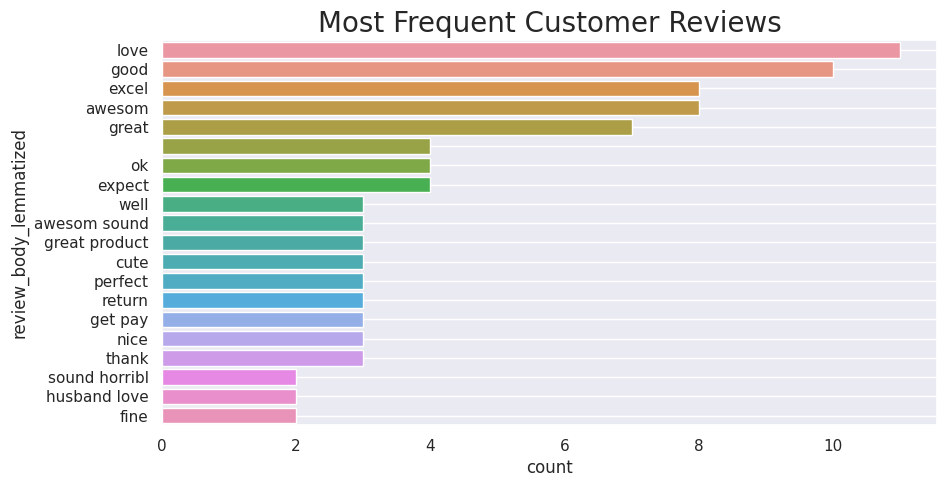

In [153]:
# plot the most frenquest reviewer job titles
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


top_20_job = Speakers['review_body_lemmatized'].value_counts().nlargest(20)

plt.figure(figsize=(10,5))
sns.countplot(y='review_body_lemmatized',data=Speakers, order=top_20_job.index)
sns.set(font_scale=2)
sns.set_context('talk')
plt.grid()
plt.title('Most Frequent Customer Reviews', fontsize=20)
# figure.savefig('most_freq_job_title.png',bbox_inches = 'tight')

plt.show()

#Keyword extraction

In [154]:

# define a function to get the most n commonly used words
stop_words = set(stopwords.words("english"))
cus_words = ["work", "place", "anonymous","anonymou","they","there","br"]
stop_words = stop_words.union(cus_words)

def get_common_words(column,n):
    text = Speakers[column].to_string()
    tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()]
    no_stops = [t for t in tokens if t not in stop_words]
    top_n = Counter(no_stops).most_common(n)
    
    return top_n

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [155]:
# get top 20 words in column 'review headline'

top_20_headline = get_common_words('review_headline', 20)
pd.DataFrame(top_20_headline, columns=['Word','Count']).T

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Word,great,sound,good,speaker,stars,one,product,nice,price,little,works,quality,five,speakers,four,star,small,buy,money,bluetooth
Count,686,596,585,545,513,228,221,206,200,195,194,188,186,179,160,153,135,124,110,107


In [156]:
# get top 20 words in column 'review body'

top_20_headline = get_common_words('review_body_lemmatized', 20)
pd.DataFrame(top_20_headline, columns=['Word','Count']).T

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Word,speaker,sound,use,good,great,one,would,qualiti,product,like,charg,volum,get,music,littl,bluetooth,time,batteri,price,phone
Count,4768,4128,2280,1915,1840,1595,1508,1294,1257,1256,1241,1185,1173,1061,1024,990,961,948,924,915


#Visualize most common unigram words

In [123]:
stop_words = set(stopwords.words("english"))
cus_words = ["work", "place", "anonymous","anonymou","they","there","br"]
stop_words = stop_words.union(cus_words)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:

# define a function to plot wordcloud

def plot_wordcloud(column):
    text = Speakers[column].to_string().lower()
    wordcloud = WordCloud(background_color='white',
                          stopwords = stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42).generate(text)

    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(column, fontsize=20)
    plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


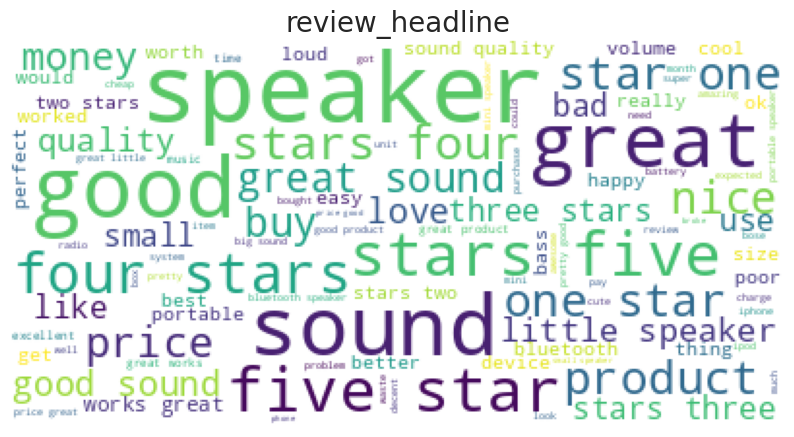

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


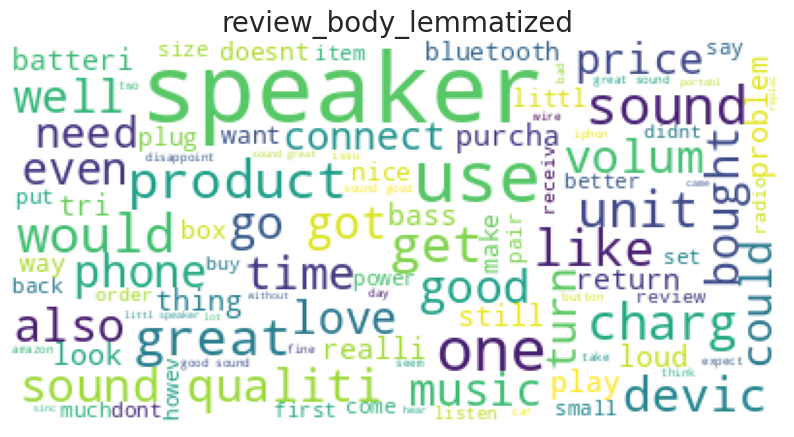

In [125]:
# plot 'headline','review body' in wordcloud

for column_name in ['review_headline', 'review_body_lemmatized']:
    plot_wordcloud(column_name)

#Visualize most common bigrams

In [126]:
# pre-processing the words

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("english"))
cus_words = ["work", "place", "anonymous","anonymou","they","there","br"]
stop_words = stop_words.union(cus_words)

def lemmatize_word(text):
    
    lem = WordNetLemmatizer()     
    tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()]
    no_stops = [t for t in tokens if t not in stop_words]   
    
    return " ".join([lem.lemmatize(word) for word in no_stops]) # make text in each row into one string
    

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [127]:
# transform the dataframe on the 3 text columns, each column is a corpus
Speakers["review_body_lemmatized"] = Speakers["review_body_lemmatized"].apply(lemmatize_word)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
# define a function to get the top bigram words

def get_top_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    dtm = vec.transform(corpus)
    sum_words = dtm.sum(axis=0)
    # sum_words only has 1 row, so we pass [0,idx] to sum_words
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)   
    
    return words_freq[:n]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
# define a function to plot the top bigram words

def plot_top_bigram(data, title):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(7,5)})
    h=sns.barplot(x="Bi-gram", y="Frequency", data=data)
    h.set_xticklabels(h.get_xticklabels(), rotation=90)
    plt.title(title, fontsize=20)
    plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


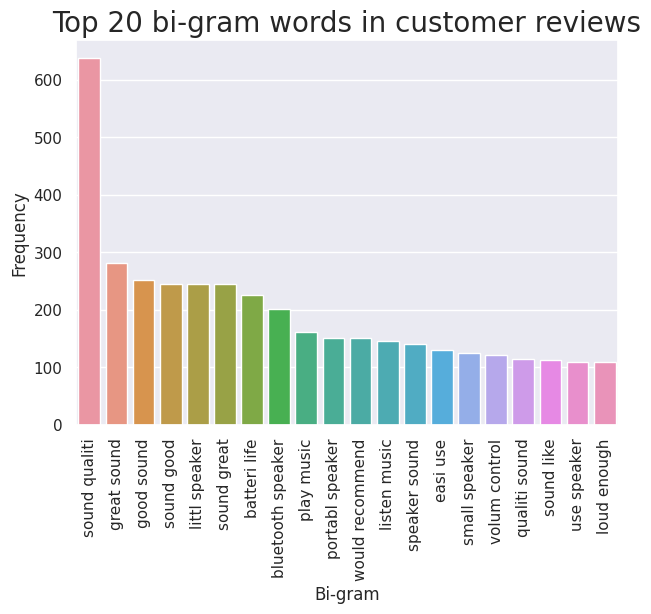

In [130]:
# plot top 20 bi-gram in headline'

top_2words_head = get_top_bigram(Speakers["review_body_lemmatized"], n=20)
top_2words_head_df = pd.DataFrame(top_2words_head,columns=["Bi-gram", "Frequency"])

plot_top_bigram(top_2words_head_df, "Top 20 bi-gram words in customer reviews")

#Topic modeling

In [157]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [158]:
# Create the document-term matrix
cv = CountVectorizer()
doc_term_matrix = cv.fit_transform(Speakers['review_body_lemmatized'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [159]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(Speakers['review_body_lemmatized'].str.split())
# Create Corpus
texts = Speakers['review_body_lemmatized']

# Term Document Frequency
corpus = [id2word.doc2bow(text.split()) for text in texts]
# View
print(corpus[:1][0][:10])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1)]


In [160]:
from pprint import pprint
import gensim.corpora as corpora
import gensim

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [161]:
# extract the reviews for each brand
brands = ['ALTEC', 'Beats', 'Bose', 'JBL','Onyx']
brand_reviews = {}
for brand in brands:
    brand_reviews[brand] = Speakers.loc[Speakers['Brands'] == brand, 'review_body_lemmatized'].tolist()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [162]:
# perform topic modeling for each brand
num_topics = 5
brand_topics = {}
for i, brand in enumerate(brands):
    lda_model_brand = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5)
    brand_topics[brand] = lda_model_brand.print_topics(num_topics=num_topics, num_words=5)

# print the topics for each brand
for brand, topics in brand_topics.items():
    print(f'Topics for {brand}:')
    for topic in topics:
        print(topic)
    print('\n')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topics for ALTEC:
(0, '0.037*"speaker" + 0.025*"sound" + 0.012*"one" + 0.012*"great" + 0.010*"like"')
(1, '0.023*"speaker" + 0.016*"sound" + 0.013*"use" + 0.009*"get" + 0.009*"littl"')
(2, '0.021*"speaker" + 0.019*"use" + 0.010*"would" + 0.010*"sound" + 0.008*"volum"')
(3, '0.022*"speaker" + 0.018*"use" + 0.017*"sound" + 0.014*"great" + 0.010*"one"')
(4, '0.036*"sound" + 0.027*"speaker" + 0.020*"good" + 0.018*"great" + 0.013*"use"')


Topics for Beats:
(0, '0.031*"sound" + 0.027*"speaker" + 0.018*"use" + 0.013*"great" + 0.011*"one"')
(1, '0.048*"speaker" + 0.019*"sound" + 0.011*"good" + 0.011*"use" + 0.009*"volum"')
(2, '0.024*"speaker" + 0.020*"product" + 0.017*"use" + 0.015*"sound" + 0.014*"great"')
(3, '0.023*"sound" + 0.020*"speaker" + 0.018*"good" + 0.013*"great" + 0.013*"charg"')
(4, '0.020*"sound" + 0.013*"good" + 0.013*"would" + 0.012*"speaker" + 0.011*"like"')


Topics for Bose:
(0, '0.041*"speaker" + 0.023*"sound" + 0.010*"one" + 0.010*"great" + 0.009*"use"')
(1, '0.031*"soun

In [163]:
!pip install pyLDAvis
import os

import pyLDAvis
import pyLDAvis.gensim
import pickle 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [164]:
# Visualize the topics
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_brand, corpus, id2word)
pyLDAvis.save_html(LDAvis_prepared, 'Review Topics for 5 brands.html')
LDAvis_prepared

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.003872  0.018090       1        1  24.632551
4     -0.026214  0.014684       2        1  21.757937
2      0.019305 -0.023170       3        1  20.678922
1      0.036668  0.010449       4        1  17.586351
0     -0.025888 -0.020052       5        1  15.344239, topic_info=        Term         Freq        Total Category  logprob  loglift
24   speaker  4577.000000  4577.000000  Default  30.0000  30.0000
52      good  1972.000000  1972.000000  Default  29.0000  29.0000
23     sound  3893.000000  3893.000000  Default  28.0000  28.0000
64     great  1870.000000  1870.000000  Default  27.0000  27.0000
29      ipod   474.000000   474.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
237    phone   135.920337   935.986340   Topic5  -5.2760  -0.0551
144  connect   125.260270   789.872412   Topic5  -5

#Sentiment Analysis on customer reviews

In [139]:
# sentiment analysis on column 'pros' and column 'cons'

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

Speakers['p_Polarity'] = Speakers['review_body_lemmatized'].astype(str).apply(pol)
Speakers['p_Subjectivity'] = Speakers['review_body_lemmatized'].astype(str).apply(sub)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [148]:
Speakers[['review_body_lemmatized','p_Polarity','p_Subjectivity']]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_body_lemmatized,p_Polarity,p_Subjectivity
0,cheap plastic feel hard turn difficult twist get past get decent sound qualiti small portabl speaker batteri last least sever hour recommend spend littl someth like jambox much happier,-0.0425,0.4625
1,bought product use ipod touch use lot plu use workout,0.0000,0.0000
2,ok speaker easi listen dont anyth easi bought bose,0.5000,0.5000
3,date iphon system expect,0.0000,0.0000
4,doesnt stay charg hour doesnt charg anoth devic play unless plug shut turn instruct dont answer email sound good speaker wait week get thailand,0.5500,0.5000
...,...,...,...
5721,total satisfi product dont know word enhanc review,0.0000,0.7500
5722,good qualiti sound someth small glad got,0.3375,0.6000
5723,happi speaker qualiti product good price would recommend anyon,0.7000,0.6000
5724,good price well need expens one stolen need someth well le expens sound good hook phone immedi good buy,0.6250,0.5500


In [144]:
Speakers['p_Polarity'].describe()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    5725.000000
mean        0.251308
std         0.255073
min        -1.000000
25%         0.083154
50%         0.254167
75%         0.402778
max         1.000000
Name: p_Polarity, dtype: float64

##Polarity vs Subjectivity plot

In [140]:
# define a fuction to plot polarity and subjectivity

def plot_polarity_subjectivity(pol,sub, column):
    ax,figure = plt.subplots(figsize=(10,8))
    plt.scatter(x=pol,y=sub, data=Speakers,c=pol)
    plt.vlines(x=0, ymin=0, ymax=1, linestyles='dashed',colors='r')
    plt.title(f'{column} Polarity vs.Subjectivity', fontsize=20)
    plt.xlabel('Polarity',fontsize=15)
    plt.ylabel('Subjectivity',fontsize=15)
    plt.xticks([-1.00,0,1.00],['Negative','Neutral','Postive'])
    plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


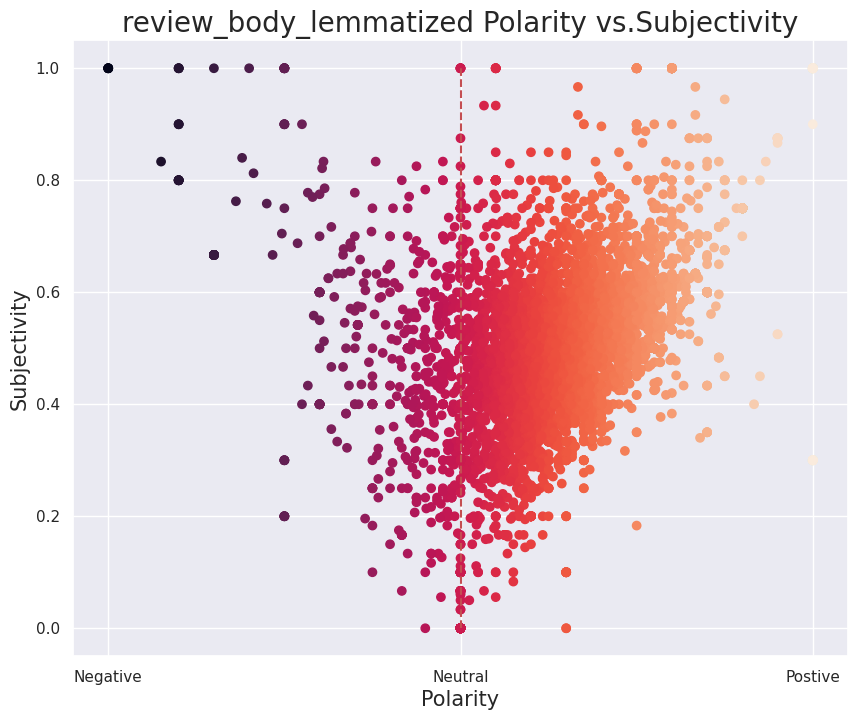

In [141]:
plot_polarity_subjectivity(pol='p_Polarity',sub='p_Subjectivity',column='review_body_lemmatized')

#Model fitting

1. bag pf words (simply takes a tokenized set of feature words and counts the number of occurrences of each word. Drawbacks include the destruction of crucial information like context and direction.)
2. TF-IDF (numerical statistic that also reflects how important a word is to a document or paragraph)

Schemes in this category, like Word2Vec, GloVe, and BERT, all have the high-level goal of optimizing a given model which creates the text embeddings.

We have applied Glove model

In [ ]:
from sklearn.model_selection import train_test_split

# split the data into train and test sets
train_df, test_df = train_test_split(Speakers, test_size=0.2, random_state=42)
bose_train_df, bose_test_df = train_test_split(Speakers, test_size=0.2, random_state=42)

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_train = tfidf_vectorizer.fit_transform(train_df['review_body_lemmatized'])
X_test = tfidf_vectorizer.transform(test_df['review_body_lemmatized'])

# create the target variable
y_train = train_df['star_rating']
y_test = test_df['star_rating']

# fit the Light GBM Regression model
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)

# evaluate the model on the test set
test_predictions = lgbm.predict(X_test)

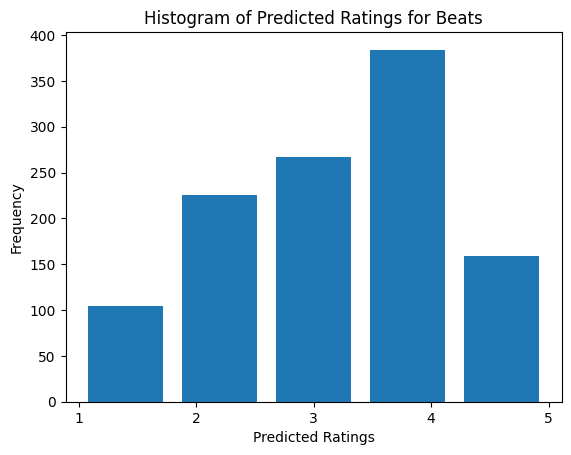

In [ ]:
import matplotlib.pyplot as plt

# round the predicted ratings to the nearest integer and convert to integer type
y_pred = np.round(test_predictions).astype(int)

# create a histogram of the predicted ratings
plt.hist(y_pred, bins=5, range=(1, 5), align='mid', rwidth=0.8)
plt.xticks([1, 2, 3, 4, 5])
plt.xlabel('Predicted Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Ratings for Beats')
plt.show()